In [6]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [8]:
df = pd.read_csv("../Cpp/Output/powVar.txt", sep='\t')
df[(df['Noise']==0.1) & (df['X']==-2.0)].head()

NoiseType  Noise    X  pow  Error Deviation  Error Minimum  Error Maximum  \
210  Gaussian    0.1 -2.0    1         1.006800       -2.08174        9.22679   
211   Uniform    0.1 -2.0    1         0.958322       -1.25152        2.11860   

     Value Deviation  Uncertainty      Mean  ...      1.1       1.3       1.5  \
210         0.219963     0.218477  0.030358  ...  0.03277  0.027106  0.019318   
211         0.209371     0.218477  0.030965  ...  0.04260  0.040700  0.038700   

         1.7       1.9       2.1       2.3       2.5       2.7       2.9  
210  0.01507  0.011126  0.009103  0.007788  0.006777  0.004653  0.002832  
211  0.03700  0.035400  0.010900  0.000000  0.000000  0.000000  0.000000  

[2 rows x 41 columns]

In [9]:
df.columns

Index(['NoiseType', 'Noise', 'X', 'pow', 'Error Deviation', 'Error Minimum',
       'Error Maximum', 'Value Deviation', 'Uncertainty', 'Mean', 'Bias',
       '-2.9', '-2.7', '-2.5', '-2.3', '-2.1', '-1.9', '-1.7', '-1.5', '-1.3',
       '-1.1', '-0.9', '-0.7', '-0.5', '-0.3', '-0.1', '0.1', '0.3', '0.5',
       '0.7', '0.9', '1.1', '1.3', '1.5', '1.7', '1.9', '2.1', '2.3', '2.5',
       '2.7', '2.9'],
      dtype='object')

In [10]:
sorted(df['Noise'].unique())

[1e-17,
 1e-16,
 1e-15,
 1e-14,
 1e-13,
 1e-12,
 1e-11,
 1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 0.195,
 0.2]

In [11]:
sNoise=sorted(df[df['Noise'] > 1e-5]['Noise'].unique())

# Deviation vs Uncertainty

In [12]:
def PlotValues( sValue=['Value Deviation', 'Uncertainty'],
                sNoise=sNoise, noiseType='Gaussian',
                sStyle=['x', '-', '--', '+'], sColor = ['r','g','b','y','c','m'],
                logx=False, logy=True, xlim=[], ylim=[]):
    fig, ax = plt.subplots()
    ax.set_title('(1 +/- noise)^exponent')
    ax.set_xlabel('Exponent')
    ax.set_ylabel(' or '.join(sValue))
    if logx:
        ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')
    if ylim:
        ax.set_ylim(ylim)
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['X'], dfPlot[value], ''.join([color, style]), label=f'{noise} {value}')
    ax.legend(bbox_to_anchor=(1.05, 1.0))


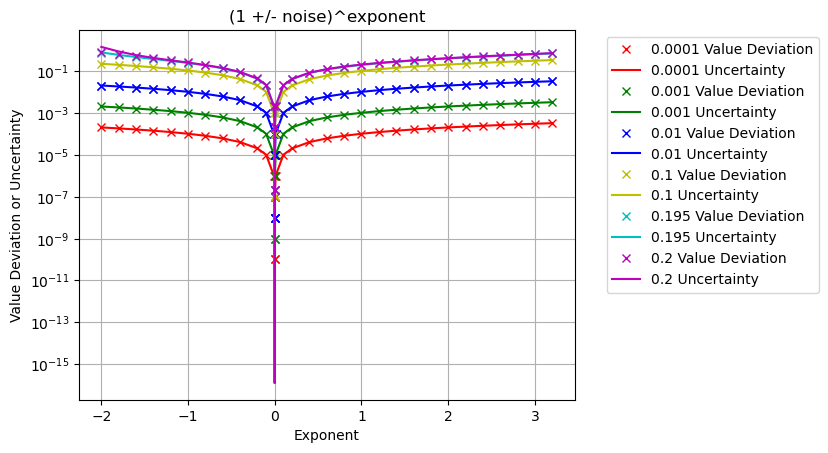

In [13]:
PlotValues()

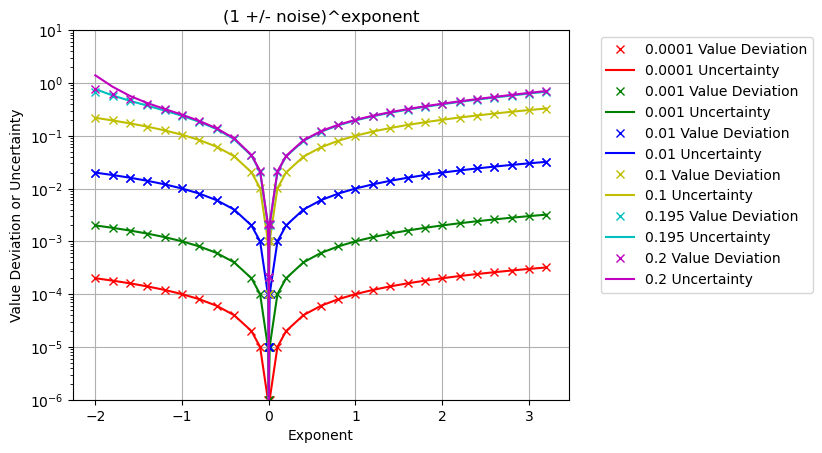

In [14]:
PlotValues(ylim=[1e-6,10])

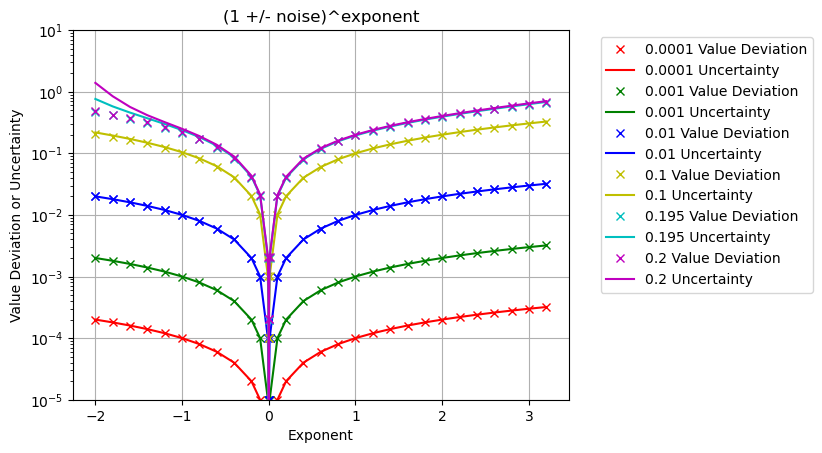

In [15]:
PlotValues(ylim=[1e-5,10], noiseType='Uniform')

In [16]:
def PlotErrorDev( noiseType='Gaussian', sNoise=sNoise,
                  sColor = ['r','g','b','y','c','m'] ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$(1 \pm \delta x)^c$ with ' + noiseType + ' noise')
    ax.set_xlabel('c')
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    ax.set_ylim([1e-6,10])
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], ''.join([color, '-']), label=f'{noise} Uncertainty')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], ''.join([color, 'x']), label=f'{noise} Value Deviation')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    #ax2.set_yscale('log')
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], ''.join([color, '--']), label=f'{noise} Error Deviation')

    ax.legend(bbox_to_anchor=(1.575, 1.0))
    ax2.legend(bbox_to_anchor=(1.575, 0.3))
    

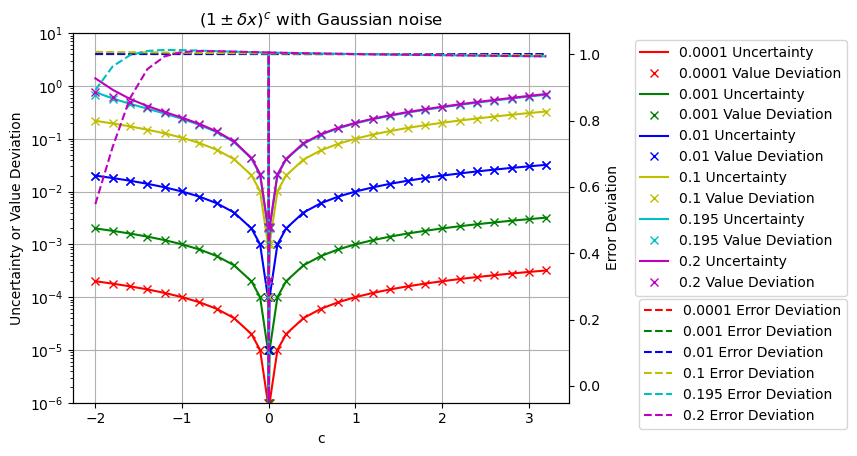

In [17]:
PlotErrorDev()

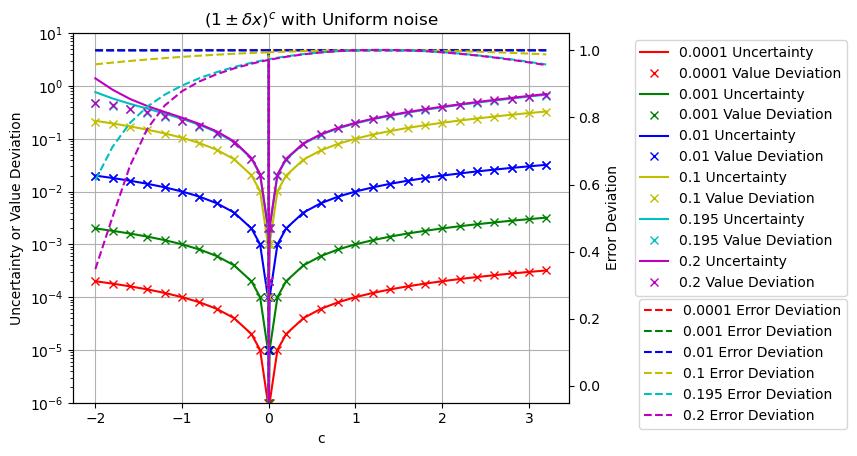

In [18]:
PlotErrorDev('Uniform')

# Mean vs Bias

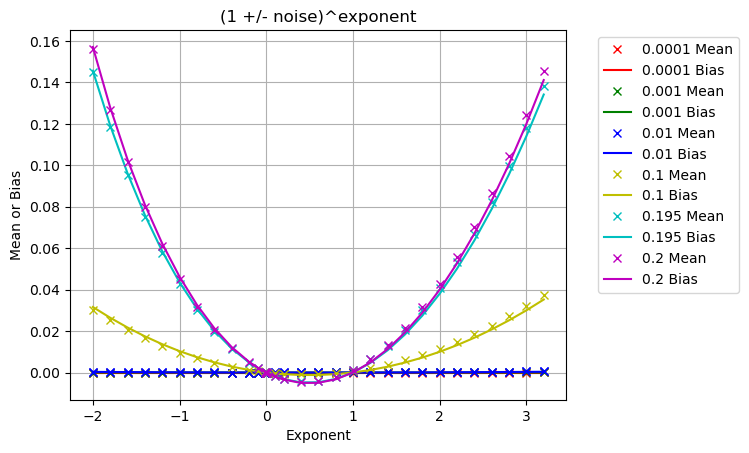

In [19]:
PlotValues(sValue=['Mean', 'Bias'], sStyle=['x', '-'], logy=False)

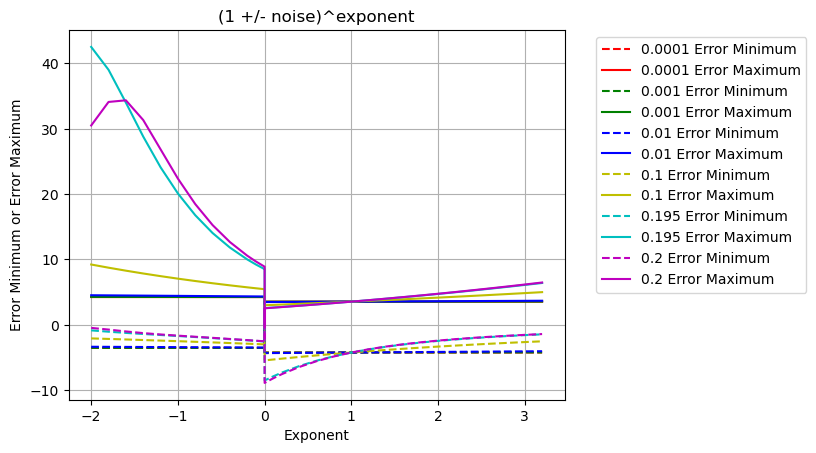

In [20]:
PlotValues(sValue=['Error Minimum', 'Error Maximum'], sStyle=['--', '-'], logy=False)

# Histogram

In [21]:
sHisto = [str(i/10) for i in range(-29, 30, 2)]
df[sHisto].head()

-2.9  -2.7  -2.5  -2.3  -2.1  -1.9  -1.7  -1.5      -1.3      -1.1  ...  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000  0.001618  ...   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.005700  0.149800  ...   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000506  0.012458  ...   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.029000  0.136000  ...   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.004458  0.029689  ...   

        1.1       1.3       1.5       1.7       1.9       2.1       2.3  \
0  0.018003  0.012946  0.009811  0.006777  0.006979  0.005361  0.004551   
1  0.032400  0.029800  0.027500  0.025500  0.023800  0.022100  0.020700   
2  0.022384  0.013775  0.011243  0.008407  0.007799  0.005469  0.005064   
3  0.033500  0.030900  0.028600  0.026500  0.024700  0.023200  0.021600   
4  0.022697  0.016922  0.012463  0.009119  0.007194  0.007194  0.005066   

        2.5       2.7       2.9  
0  0.003034  0.002529  0.001618  
1  0.008500  0.000000  0.000000  
2  0.003646  0.003039  0.002127  
3  0.003300  0.000000  0.000000  
4  0.004864  0.003141  0.002938  

[5 rows x 30 columns]

In [22]:
def PlotHisto( sNoiseType=['Uniform'], sNoise=df['Noise'].unique(), sX=df['X'].unique(),
               sStyle=['r-', 'r--', 'g-', 'g--', 'b-', 'b--', 'y-', 'y--', 'c-', 'c--', 'm-', 'm--'] ):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType'].isin(sNoiseType)) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    # return dfPlot
    ax = dfPlot[sHisto].T.plot( xlabel='Normalized Error', ylabel='Normalized Histogram Count',
                                title='(1 +/- noise)^exponent',
                                style=sStyle)
    ax.grid(True)
    ax.legend(bbox_to_anchor=(1.0, 1.0))    


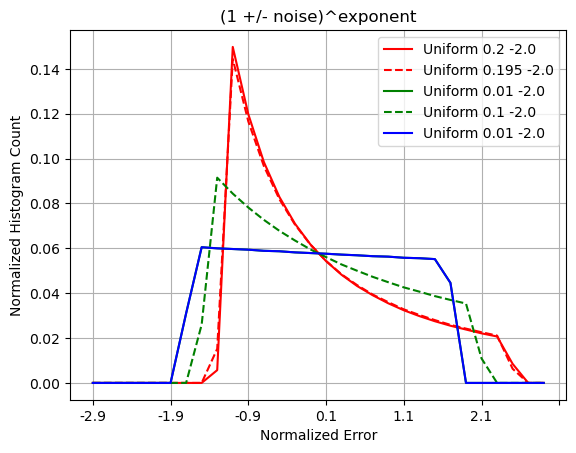

In [23]:
PlotHisto( sNoise=[0.01, 0.02, 0.05, 0.1, 0.195, 0.2], sX=[-1.5,-2] )

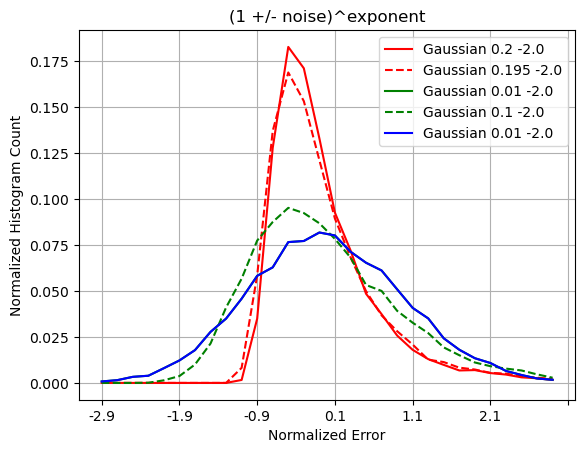

In [24]:
PlotHisto( sNoise=[0.01, 0.02, 0.05, 0.1, 0.195, 0.2], sX=[-1.5,-2],sNoiseType=['Gaussian'] )

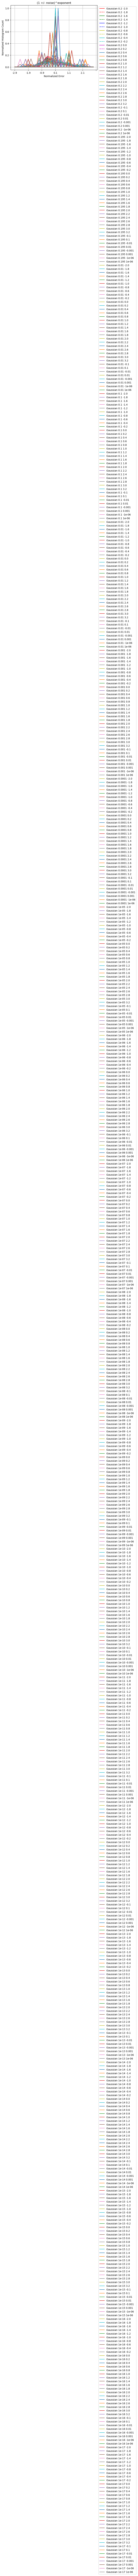

In [25]:
PlotHisto(sNoiseType=['Gaussian'])

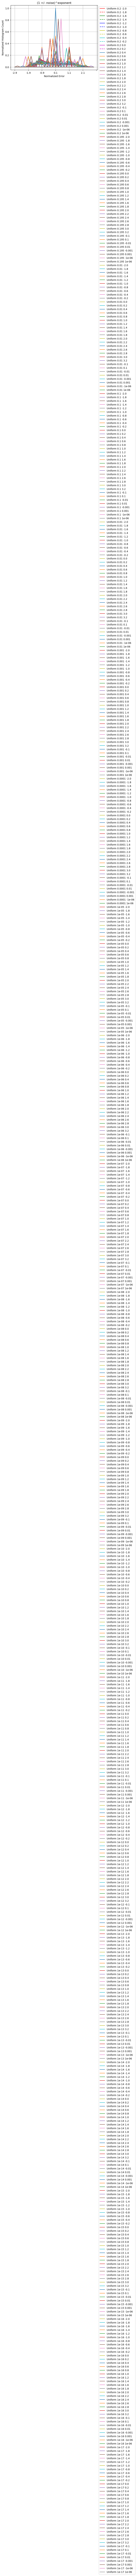

In [26]:
PlotHisto()

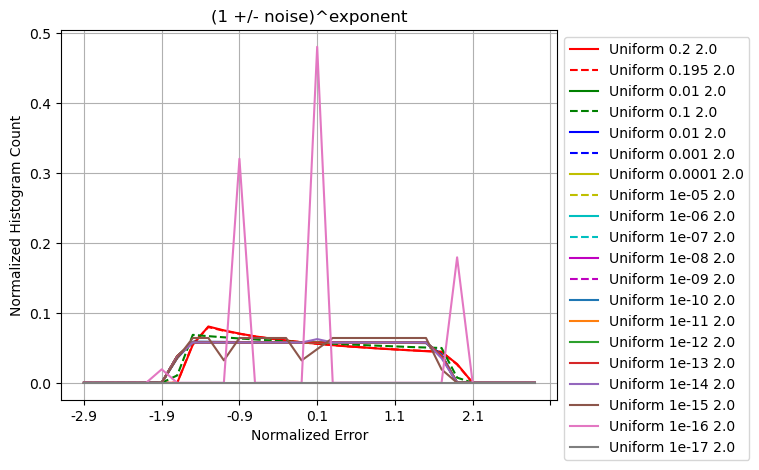

In [27]:
PlotHisto(sX=[2])

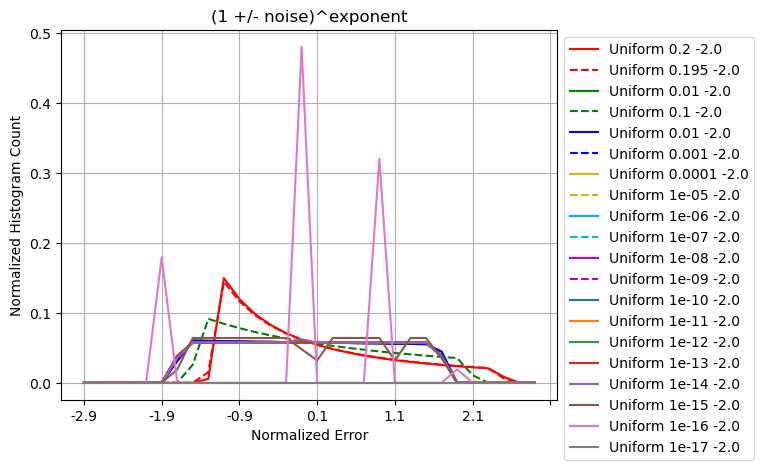

In [28]:
PlotHisto(sX=[-2])

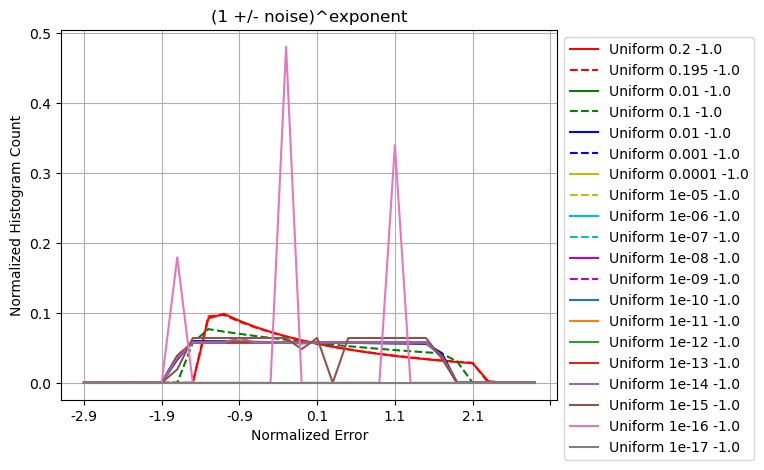

In [29]:
PlotHisto(sX=[-1])

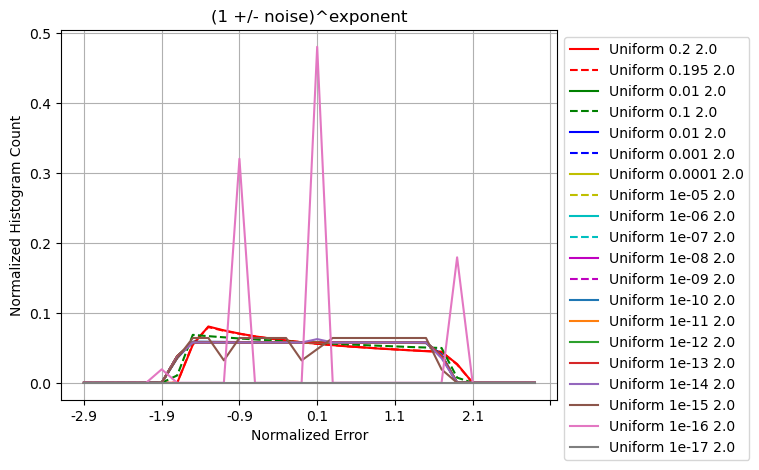

In [30]:
PlotHisto(sX=[2])

In [31]:
PlotHisto(sX=[-0.5])

TypeError: no numeric data to plot

In [ ]:
PlotHisto(sX=[0.75])

In [ ]:
PlotHisto(sX=[-0.75])

In [ ]:
PlotHisto(sX=[+1])

In [ ]:
PlotHisto(sX=[-1])

# Expansion

In [ ]:
df = pd.read_csv("./Java/Output/PowerExpansion.txt", sep='\t')
df.head()

In [ ]:
def PlotTerms( value='Variance', sExp=[-2.0, -1.5, -1.0, -0.5], sDev=[0.2, 0.195],
               sStyle=['-', '--', 'x', '+'], sColor = ['r','g','b','y','c','m'],
               logx=False, logy=True, xlim=[], ylim=[]):
    fig, ax = plt.subplots()
    ax.set_title(r'$(1 \pm \delta x)^c$')
    ax.set_xlabel('2n')
    ax.set_ylabel(f'Expanded {value} Term')
    if logx:
        ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')
    if ylim:
        ax.set_ylim(ylim)
    plt.grid(True)
    for exp, color in zip(sExp, sColor):
        for dev, style in zip(sDev, sStyle):
            dfPlot = df[(df['Exponent']==exp) & (df['Input Uncertainty']==dev)]
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['2n'], dfPlot[value], ''.join([color, style]), label=f'{exp}  {dev}')
    ax.legend(bbox_to_anchor=(1.05, 1.0))


In [ ]:
PlotTerms()